In [3]:
import json
import csv
import os
import openpyxl
import pandas as pd
import re
import csv 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Cargamos un Dataset para entender su estructura
df = pd.read_parquet('./Datasets/AutosdeAlquiler/Data Uber 2021/fhv_tripdata_2021-01.parquet')

# Mostrar el DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154112 entries, 0 to 1154111
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1154112 non-null  object        
 1   pickup_datetime         1154112 non-null  datetime64[us]
 2   dropOff_datetime        1154112 non-null  datetime64[us]
 3   PUlocationID            195845 non-null   float64       
 4   DOlocationID            991892 non-null   float64       
 5   SR_Flag                 0 non-null        object        
 6   Affiliated_base_number  1153227 non-null  object        
dtypes: datetime64[us](2), float64(2), object(3)
memory usage: 61.6+ MB
None


In [6]:
#Definimos el directorio de los archivos y el tratamiento que aplicaremos:

input_dir = './Datasets/AutosdeAlquiler/Data Uber 2021/'  # Directorio donde se encuentran los archivos Parquet
output_dir = './Datasets/ProcessedDatasets/Alquileres-2021'  # Directorio donde se guardarán los archivos procesados

# Nos aseguramos de que el directorio de salida existe y este ok
os.makedirs(output_dir, exist_ok=True)

# Listamos los archivos Parquet
parquet_files = [f for f in os.listdir(input_dir) if f.endswith('.parquet') and f.startswith('fhv_tripdata_2021')]


In [7]:
# Aplicamos el tratamiento a cada archivo y lo guardarmos

for file in parquet_files:
    file_path = os.path.join(input_dir, file)
    
    # Cargar el archivo Parquet
    df = pd.read_parquet(file_path)
    
    # Eliminar las filas con valores nulos en PUlocationID y DOlocationID
    df = df.dropna(subset=['PUlocationID', 'DOlocationID'])

    # Convertimos los valores de PUlocationID y DOlocationID de float a int
    df['PUlocationID'] = df['PUlocationID'].astype(int)
    df['DOlocationID'] = df['DOlocationID'].astype(int)
    
    # Eliminar la columna SR_Flag
    df = df.drop(columns=['SR_Flag', 'Affiliated_base_number'])
    
    # Guardar el DataFrame procesado en un nuevo archivo Parquet
    output_file_path = os.path.join(output_dir, file)
    df.to_parquet(output_file_path, index=False)
    
    print(f'Processed and saved: {output_file_path}')


Processed and saved: ./Datasets/ProcessedDatasets/Alquileres-2021\fhv_tripdata_2021-01.parquet
Processed and saved: ./Datasets/ProcessedDatasets/Alquileres-2021\fhv_tripdata_2021-02.parquet
Processed and saved: ./Datasets/ProcessedDatasets/Alquileres-2021\fhv_tripdata_2021-03.parquet
Processed and saved: ./Datasets/ProcessedDatasets/Alquileres-2021\fhv_tripdata_2021-04.parquet
Processed and saved: ./Datasets/ProcessedDatasets/Alquileres-2021\fhv_tripdata_2021-05.parquet
Processed and saved: ./Datasets/ProcessedDatasets/Alquileres-2021\fhv_tripdata_2021-06.parquet
Processed and saved: ./Datasets/ProcessedDatasets/Alquileres-2021\fhv_tripdata_2021-07.parquet
Processed and saved: ./Datasets/ProcessedDatasets/Alquileres-2021\fhv_tripdata_2021-08.parquet
Processed and saved: ./Datasets/ProcessedDatasets/Alquileres-2021\fhv_tripdata_2021-09.parquet
Processed and saved: ./Datasets/ProcessedDatasets/Alquileres-2021\fhv_tripdata_2021-10.parquet
Processed and saved: ./Datasets/ProcessedDatasets/

In [10]:
# Visualizamos como quedaron 

output_dir = './Datasets/ProcessedDatasets/Alquileres-2021'  # Directorio donde se guardaron los archivos procesados

# Listamos los archivos Parquet procesados
processed_parquet_files = [os.path.join(output_dir, f) for f in os.listdir(output_dir) if f.endswith('.parquet')]

# Leemos y concatenamos todos los archivos Parquet en un único DataFrame
df_all = pd.concat([pd.read_parquet(file) for file in processed_parquet_files], ignore_index=True)

# Mostrar información del DataFrame concatenado
print(df_all.info())

# Mostrar las primeras filas del DataFrame concatenado
print(df_all.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559835 entries, 0 to 2559834
Data columns (total 5 columns):
 #   Column                Dtype         
---  ------                -----         
 0   dispatching_base_num  object        
 1   pickup_datetime       datetime64[us]
 2   dropOff_datetime      datetime64[us]
 3   PUlocationID          int32         
 4   DOlocationID          int32         
dtypes: datetime64[us](2), int32(2), object(1)
memory usage: 78.1+ MB
None
  dispatching_base_num     pickup_datetime    dropOff_datetime  PUlocationID  \
0               B00254 2021-01-01 00:21:20 2021-01-01 00:27:33           236   
1      B00290          2021-01-01 00:51:35 2021-01-01 01:04:45           196   
2               B00419 2021-01-01 00:00:20 2021-01-01 00:00:24            60   
3               B00419 2021-01-01 00:14:04 2021-01-01 00:14:11           241   
4               B00419 2021-01-01 00:21:15 2021-01-01 00:21:27            18   

   DOlocationID  
0           237  
1 

In [11]:
df_all

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID
0,B00254,2021-01-01 00:21:20,2021-01-01 00:27:33,236,237
1,B00290,2021-01-01 00:51:35,2021-01-01 01:04:45,196,196
2,B00419,2021-01-01 00:00:20,2021-01-01 00:00:24,60,60
3,B00419,2021-01-01 00:14:04,2021-01-01 00:14:11,241,241
4,B00419,2021-01-01 00:21:15,2021-01-01 00:21:27,18,18
...,...,...,...,...,...
2559830,B03380,2021-12-31 23:16:13,2021-12-31 23:27:23,249,164
2559831,B03380,2021-12-31 23:42:11,2022-01-01 00:01:13,162,158
2559832,B03380,2021-12-31 23:11:36,2021-12-31 23:17:24,137,224
2559833,B03380,2021-12-31 23:31:57,2021-12-31 23:38:34,137,79


In [12]:
# Convertimos las columnas de fecha y hora a formato datetime
df_all['pickup_datetime'] = pd.to_datetime(df_all['pickup_datetime'])
df_all['dropOff_datetime'] = pd.to_datetime(df_all['dropOff_datetime'])


In [13]:
# Creamos columnas separadas para fecha de pickup
df_all['pickup_date'] = df_all['pickup_datetime'].dt.date

In [14]:
# Calculamos el tiempo total de los viajes
df_all['trip_duration'] = df_all['dropOff_datetime'] - df_all['pickup_datetime']


In [15]:
df_all

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,pickup_date,trip_duration
0,B00254,2021-01-01 00:21:20,2021-01-01 00:27:33,236,237,2021-01-01,0 days 00:06:13
1,B00290,2021-01-01 00:51:35,2021-01-01 01:04:45,196,196,2021-01-01,0 days 00:13:10
2,B00419,2021-01-01 00:00:20,2021-01-01 00:00:24,60,60,2021-01-01,0 days 00:00:04
3,B00419,2021-01-01 00:14:04,2021-01-01 00:14:11,241,241,2021-01-01,0 days 00:00:07
4,B00419,2021-01-01 00:21:15,2021-01-01 00:21:27,18,18,2021-01-01,0 days 00:00:12
...,...,...,...,...,...,...,...
2559830,B03380,2021-12-31 23:16:13,2021-12-31 23:27:23,249,164,2021-12-31,0 days 00:11:10
2559831,B03380,2021-12-31 23:42:11,2022-01-01 00:01:13,162,158,2021-12-31,0 days 00:19:02
2559832,B03380,2021-12-31 23:11:36,2021-12-31 23:17:24,137,224,2021-12-31,0 days 00:05:48
2559833,B03380,2021-12-31 23:31:57,2021-12-31 23:38:34,137,79,2021-12-31,0 days 00:06:37


In [16]:
# Agrupamos por dispatching_base_num y pickup_date y sumamos el tiempo total de viajes por grupo
grouped_df = df_all.groupby(['dispatching_base_num', 'pickup_date']).agg({
    'pickup_datetime': 'count',
    'trip_duration': 'sum'
}).rename(columns={'pickup_datetime': 'total_trips'})

#### Mapa de Calor de Viajes por Hora del Día

[Text(0, 0.5, 'Monday'),
 Text(0, 1.5, 'Tuesday'),
 Text(0, 2.5, 'Wednesday'),
 Text(0, 3.5, 'Thursday'),
 Text(0, 4.5, 'Friday'),
 Text(0, 5.5, 'Saturday'),
 Text(0, 6.5, 'Sunday')]

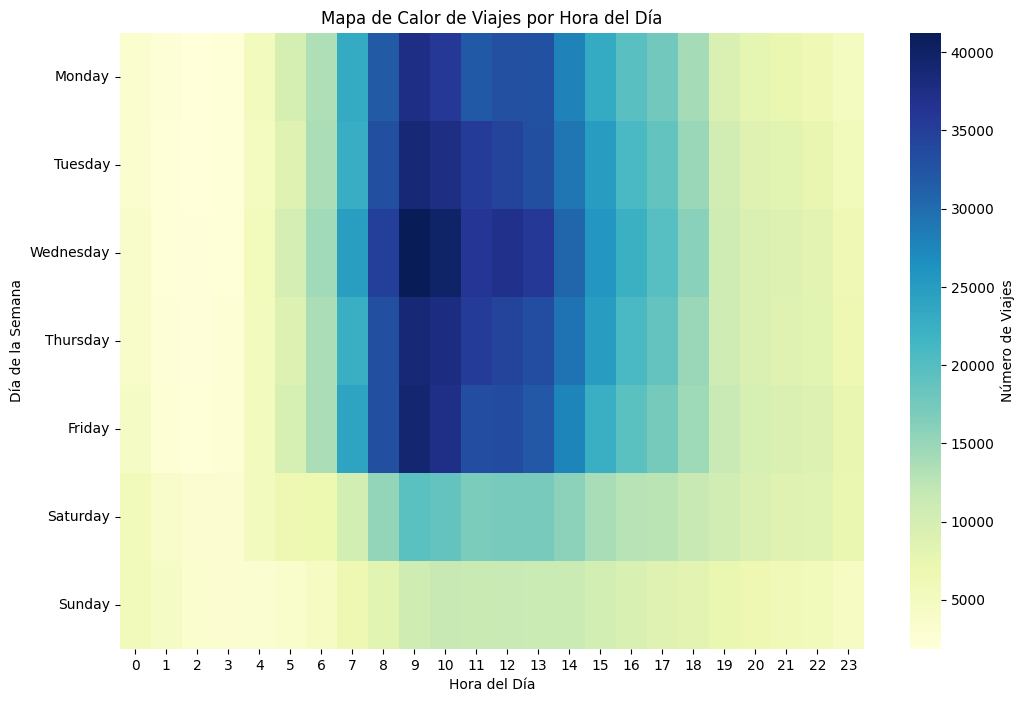

In [17]:
# Extraemos la hora de pickup
df_all['pickup_hour'] = df_all['pickup_datetime'].dt.hour

# Agrupamos por día de la semana y hora de pickup
heatmap_data = df_all.groupby([df_all['pickup_datetime'].dt.weekday, 'pickup_hour']).size().unstack().fillna(0)

# Creamos una lista con los nombres de los días de la semana
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Graficar mapa de calor
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Número de Viajes'})
ax.set_title('Mapa de Calor de Viajes por Hora del Día')
ax.set_xlabel('Hora del Día')
ax.set_ylabel('Día de la Semana')
ax.set_yticklabels(days_of_week, rotation=0)  # Establecer etiquetas de los días de la semana

#### Distribución de la Duración de los Viajes por Mes 

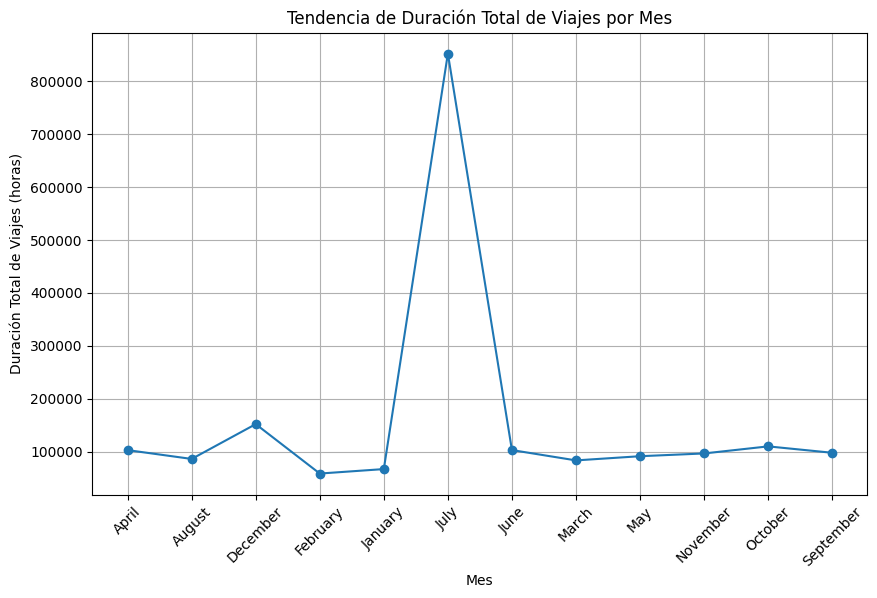

In [18]:
# Calcular la duración total de los viajes en horas
df_all['trip_duration_hours'] = (df_all['dropOff_datetime'] - df_all['pickup_datetime']).dt.total_seconds() / 3600

# Extraer el mes de la fecha de recogida
df_all['pickup_month'] = df_all['pickup_datetime'].dt.month_name()

# Agrupar por mes y sumar la duración total de los viajes en horas
monthly_duration = df_all.groupby('pickup_month')['trip_duration_hours'].sum()

# Graficar la tendencia de duración total de los viajes por mes
plt.figure(figsize=(10, 6))
plt.plot(monthly_duration.index, monthly_duration.values, marker='o')
plt.title('Tendencia de Duración Total de Viajes por Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Total de Viajes (horas)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

El mes de Julio prescenta una irregularidad asi que verificaremos Outlier 

In [19]:
# Filtrar los datos de julio
july_data = df_all[df_all['pickup_month'] == 'July']

# Ordenar los datos de julio por duración de viaje en orden descendente
july_data_sorted = july_data.sort_values(by='trip_duration_hours', ascending=False)

# Mostrar los valores más grandes de julio
print(july_data_sorted.head(10))  # Muestra los 10 valores más grandes

        dispatching_base_num     pickup_datetime    dropOff_datetime  \
1164469      B03285          2021-07-01 13:53:02 2021-07-31 15:22:38   
1166157      B03285          2021-07-01 17:13:57 2021-07-31 18:02:09   
1163234      B03285          2021-07-01 11:39:13 2021-07-31 12:24:46   
1164455      B03285          2021-07-01 13:37:09 2021-07-31 14:14:49   
1167000      B03285          2021-07-01 22:22:19 2021-07-31 22:58:45   
1166725      B03285          2021-07-01 20:21:58 2021-07-31 20:58:18   
1164978      B03285          2021-07-01 14:27:07 2021-07-31 14:53:28   
1166403      B03285          2021-07-01 18:32:27 2021-07-31 18:58:35   
1163232      B03285          2021-07-01 11:32:52 2021-07-31 11:57:18   
1165807      B03285          2021-07-01 16:23:25 2021-07-31 16:43:38   

         PUlocationID  DOlocationID pickup_date    trip_duration  pickup_hour  \
1164469           164             9  2021-07-01 30 days 01:29:36           13   
1166157            82            73  2021-07-

In [ ]:
july_data_sorted

In [20]:
#Necesitamos eliminar el Outlier que se encuentra en Julio

df_all['trip_duration_hours'] = (df_all['dropOff_datetime'] - df_all['pickup_datetime']).dt.total_seconds() / 3600
df_all['pickup_month'] = df_all['pickup_datetime'].dt.month_name()

# Agrupamos por mes y sumar la duración total de los viajes en horas
monthly_duration = df_all.groupby('pickup_month')['trip_duration_hours'].sum().reset_index()

# Calcular Q1, Q3 y el IQR
Q1 = monthly_duration['trip_duration_hours'].quantile(0.25)
Q3 = monthly_duration['trip_duration_hours'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Identificar y eliminar outliers
filtered_data = monthly_duration[(monthly_duration['trip_duration_hours'] >= lower_bound) & 
                                 (monthly_duration['trip_duration_hours'] <= upper_bound)]

print("Datos filtrados sin outliers:")
print(filtered_data)

Lower Bound: 56509.28170138886, Upper Bound: 133222.22364583335
Datos filtrados sin outliers:
   pickup_month  trip_duration_hours
0         April        102616.770000
1        August         85963.810000
3      February         58364.213056
4       January         66815.453056
6          June        102708.604444
7         March         83215.109722
8           May         91124.838333
9      November         96335.921111
10      October        109693.668333
11    September         97623.724722


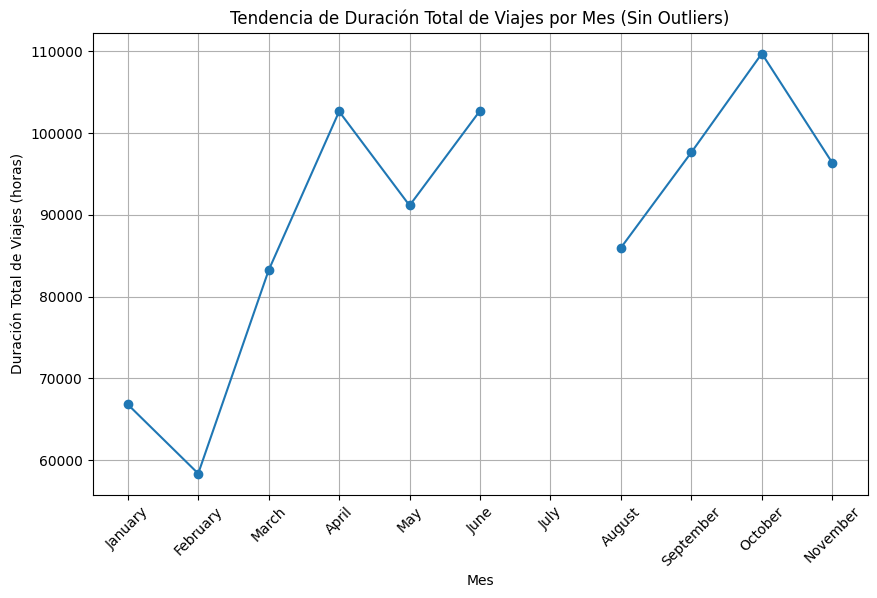

In [21]:

# Crear una lista con el orden correcto de los meses
ordered_months = ["January", "February", "March", "April", "May", "June", 
                  "July", "August", "September", "October", "November", "December"]

# Reindexar para asegurar el orden correcto de los meses
filtered_data = filtered_data.set_index('pickup_month').reindex(ordered_months).reset_index()

# Graficar la tendencia de duración total de los viajes por mes sin los outliers
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['pickup_month'], filtered_data['trip_duration_hours'], marker='o')
plt.title('Tendencia de Duración Total de Viajes por Mes (Sin Outliers)')
plt.xlabel('Mes')
plt.ylabel('Duración Total de Viajes (horas)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [22]:
# Creamos una copia del dataframe para visualizar la distribucion por zonas
df_zona = df_all.copy()

In [114]:
df_zona

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,pickup_date,trip_duration,pickup_hour,trip_duration_hours,pickup_month
0,B00254,2021-01-01 00:21:20,2021-01-01 00:27:33,236,237,2021-01-01,0 days 00:06:13,0,0.103611,January
1,B00290,2021-01-01 00:51:35,2021-01-01 01:04:45,196,196,2021-01-01,0 days 00:13:10,0,0.219444,January
2,B00419,2021-01-01 00:00:20,2021-01-01 00:00:24,60,60,2021-01-01,0 days 00:00:04,0,0.001111,January
3,B00419,2021-01-01 00:14:04,2021-01-01 00:14:11,241,241,2021-01-01,0 days 00:00:07,0,0.001944,January
4,B00419,2021-01-01 00:21:15,2021-01-01 00:21:27,18,18,2021-01-01,0 days 00:00:12,0,0.003333,January
...,...,...,...,...,...,...,...,...,...,...
2559830,B03380,2021-12-31 23:16:13,2021-12-31 23:27:23,249,164,2021-12-31,0 days 00:11:10,23,0.186111,December
2559831,B03380,2021-12-31 23:42:11,2022-01-01 00:01:13,162,158,2021-12-31,0 days 00:19:02,23,0.317222,December
2559832,B03380,2021-12-31 23:11:36,2021-12-31 23:17:24,137,224,2021-12-31,0 days 00:05:48,23,0.096667,December
2559833,B03380,2021-12-31 23:31:57,2021-12-31 23:38:34,137,79,2021-12-31,0 days 00:06:37,23,0.110278,December


In [24]:
# Cargamos el glosario de zonas
df_z = pd.read_csv('./Datasets/taxi+_zone_lookup.csv')

In [116]:
df_z

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


#### Mapa de Calor por Zona 

In [25]:
# Relacionar PUlocationID con LocationID y obtener PUborough
df_zona = df_zona.merge(df_z[['LocationID', 'Borough']], how='left', left_on='PUlocationID', right_on='LocationID')
df_zona = df_zona.rename(columns={'Borough': 'PUborough'})

# Relacionar DOlocationID con LocationID y obtener DOborough
df_zona = df_zona.merge(df_z[['LocationID', 'Borough']], how='left', left_on='DOlocationID', right_on='LocationID')
df_zona = df_zona.rename(columns={'Borough': 'DOborough'})

# Eliminar columnas LocationID sobrantes
df_zona = df_zona.drop(columns=['LocationID_x', 'LocationID_y'])

print(df_zona)

        dispatching_base_num     pickup_datetime    dropOff_datetime  \
0                     B00254 2021-01-01 00:21:20 2021-01-01 00:27:33   
1            B00290          2021-01-01 00:51:35 2021-01-01 01:04:45   
2                     B00419 2021-01-01 00:00:20 2021-01-01 00:00:24   
3                     B00419 2021-01-01 00:14:04 2021-01-01 00:14:11   
4                     B00419 2021-01-01 00:21:15 2021-01-01 00:21:27   
...                      ...                 ...                 ...   
2559830               B03380 2021-12-31 23:16:13 2021-12-31 23:27:23   
2559831               B03380 2021-12-31 23:42:11 2022-01-01 00:01:13   
2559832               B03380 2021-12-31 23:11:36 2021-12-31 23:17:24   
2559833               B03380 2021-12-31 23:31:57 2021-12-31 23:38:34   
2559834               B03380 2021-12-31 23:41:35 2022-01-01 00:14:39   

         PUlocationID  DOlocationID pickup_date   trip_duration  pickup_hour  \
0                 236           237  2021-01-01 0 days 

In [118]:
df_zona

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,pickup_date,trip_duration,pickup_hour,trip_duration_hours,pickup_month,PUborough,DOborough
0,B00254,2021-01-01 00:21:20,2021-01-01 00:27:33,236,237,2021-01-01,0 days 00:06:13,0,0.103611,January,Manhattan,Manhattan
1,B00290,2021-01-01 00:51:35,2021-01-01 01:04:45,196,196,2021-01-01,0 days 00:13:10,0,0.219444,January,Queens,Queens
2,B00419,2021-01-01 00:00:20,2021-01-01 00:00:24,60,60,2021-01-01,0 days 00:00:04,0,0.001111,January,Bronx,Bronx
3,B00419,2021-01-01 00:14:04,2021-01-01 00:14:11,241,241,2021-01-01,0 days 00:00:07,0,0.001944,January,Bronx,Bronx
4,B00419,2021-01-01 00:21:15,2021-01-01 00:21:27,18,18,2021-01-01,0 days 00:00:12,0,0.003333,January,Bronx,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...
2559830,B03380,2021-12-31 23:16:13,2021-12-31 23:27:23,249,164,2021-12-31,0 days 00:11:10,23,0.186111,December,Manhattan,Manhattan
2559831,B03380,2021-12-31 23:42:11,2022-01-01 00:01:13,162,158,2021-12-31,0 days 00:19:02,23,0.317222,December,Manhattan,Manhattan
2559832,B03380,2021-12-31 23:11:36,2021-12-31 23:17:24,137,224,2021-12-31,0 days 00:05:48,23,0.096667,December,Manhattan,Manhattan
2559833,B03380,2021-12-31 23:31:57,2021-12-31 23:38:34,137,79,2021-12-31,0 days 00:06:37,23,0.110278,December,Manhattan,Manhattan


In [27]:
# Guardamos el DataFrame en un archivo Parquet
df_zona.to_parquet('./Datasets/AutosdeAlquiler/Alquileres-con-zona-2021.parquet')

# Confirmación de que el archivo se ha guardado correctamente
print("Archivo guardado en formato Parquet exitosamente.")

Archivo guardado en formato Parquet exitosamente.
